# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [514]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [515]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

In [516]:
import pandas as pd

filename = 'wine_alcohol.csv'
df = pd.read_csv(filename, sep=';')

df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


In [517]:
len(df.index.unique()) == len(df['id'])

True

In [518]:
df = df.set_index('id')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [520]:
print(f'Número total de NA en el dataframe: {(col_na:=df.isna().sum()).sum()}')
pd.DataFrame({'Valores NA': col_na})

Número total de NA en el dataframe: 0


,Valores NA
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [521]:
significant_info = ['mean', 'std', 'min', 'max']
df.describe().T.loc[:, significant_info]

,mean,std,min,max
fixed acidity,7.215307,1.296434,3.80000,15.90000
volatile acidity,0.339666,0.164636,0.08000,1.58000
citric acid,0.318633,0.145318,0.00000,1.66000
residual sugar,5.443235,4.757804,0.60000,65.80000
chlorides,0.056034,0.035034,0.00900,0.61100
free sulfur dioxide,30.525319,17.749400,1.00000,289.00000
total sulfur dioxide,115.744574,56.521855,6.00000,440.00000
density,0.994697,0.002999,0.98711,1.03898
pH,3.218501,0.160787,2.72000,4.01000
sulphates,0.531268,0.148806,0.22000,2.00000


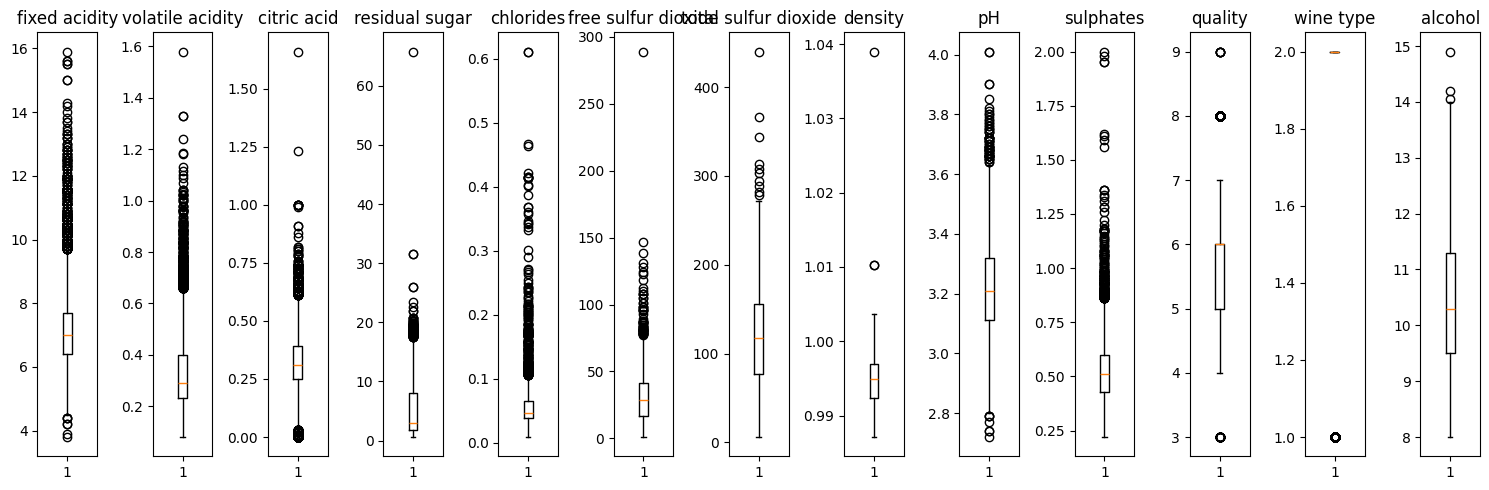

In [522]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

for i, columna in enumerate(df.columns):
    axs[i].boxplot(df[columna])
    axs[i].set_title(columna)

plt.tight_layout()

plt.show()

Se comienza tratando de eliminar valores que no tengan sentido en las variables:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- quality
- winetype
- alcohol

Como no somos expertos en el campo, vamos a estudiar un subconjunto de las variables para la limpieza del dataset, y posteriormente estimaremos la forma de eliminar outliers de todas las variables sin atender al significado de los outliers en variables que no pertenezcan al subconjunto de limpieza.

Subconjunto sobre el que se hace limpieza:
- citric acid
- pH
- quality
- winetype
- alcohol

Aunque **fixed acidity** y **volatile acidity** son valores importantes no somos expertos y se definen a partir de la combinación de ácidos de distintos tipos, los excluimos del analisis inicial en limpieza. 

Solo haremos limpieza sobre la variable **citric acid** la cual nos indica la acidez que aporta el ácido cítrico, el cual es un ácido no volátil (en inglés non volatiles o **fixed acids**) que deberá estar correlacionado con los valores de la variable **fixed acid**.

##### Variable: **citric acid**

Investigando un poco podemos suponer que la variable **citric acid** se expresa concentración, la cual se suele expresar en g/L, algo lógico al estar la media en 0.3 que tiene sentido estando el rango habitual(*) entre 0 y 1 g/L. 
 
(*Fuente: https://www.vinosycavasonline.es/los-aacidos-del-vino.-quae-son-y-caomo-se-forman.#:~:text=El%20%C3%A1cido%20c%C3%ADtrico%20est%C3%A1%20presente,1%2D1%20g%2Fl.)

In [523]:
df.describe().drop('count').T.loc[['citric acid'], :]

,mean,std,min,25%,50%,75%,max
citric acid,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66


No obstante, el máximo supera 1g/L lo cual no es posible al ser este el actual límite
jurídico europeo(*).  

(*Fuente: https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)

In [524]:
c_acid_ilegal = df.loc[:, 'citric acid'] > 1 
print('Número de vinos ilegales:', c_acid_ilegal.sum())
df[c_acid_ilegal].head()

Número de vinos ilegales: 2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,,,,,,,,,,,,,
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,6,2,12.2
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,6,2,13.1


Se eliminan:

In [525]:
df = df[~c_acid_ilegal]
len(df)

6495

##### Variable: **pH**

En cuanto a la variable **pH** los valores normales oscilan entre 3 y 4 (*), nuestros valores mínimo y máximo son 2.72 y 4.01 el valor máximo no se aleja del rango pero si que ocurre con el mínimo.

(*Fuente: https://www.hannainst.es/blog/1513/pH-en-la-elaboracion-del-vino#:~:text=La%20mayor%C3%ADa%20de%20los%20vinos,m%C3%A1s%20comunes%20para%20los%20tintos.)

Tomamos la decisión de aquellos por debajo de 3 convertirlos a 3 y aquellos por encima de 4 (aunque solo 0.01) convertirlos a 4:

In [526]:
ph_lt_3 = df.loc[:, 'pH'] < 3 
ph_gt_4 = df.loc[:, 'pH'] > 4

print('Número de vinos con pH < 3:', ph_lt_3.sum())
print('Número de vinos con pH > 4:', ph_gt_4.sum())

df.loc[ph_lt_3, 'pH'] = 3
df.loc[ph_gt_4, 'pH'] = 4

print('Conversión a rango [3, 4]')
df.describe().drop('count').T.loc[['pH'], :]

Número de vinos con pH < 3: 466
Número de vinos con pH > 4: 2
Conversión a rango [3, 4]


,mean,std,min,25%,50%,75%,max
pH,3.223012,0.153063,3.0,3.11,3.21,3.32,4.0


Se ha tomado esta decisión en vez de eliminar o sustituir por una medida de centralización como la media, por ser simple y no estar los valores excesivamente alejados (tan solo 0.3 unidades como mucho del rango)

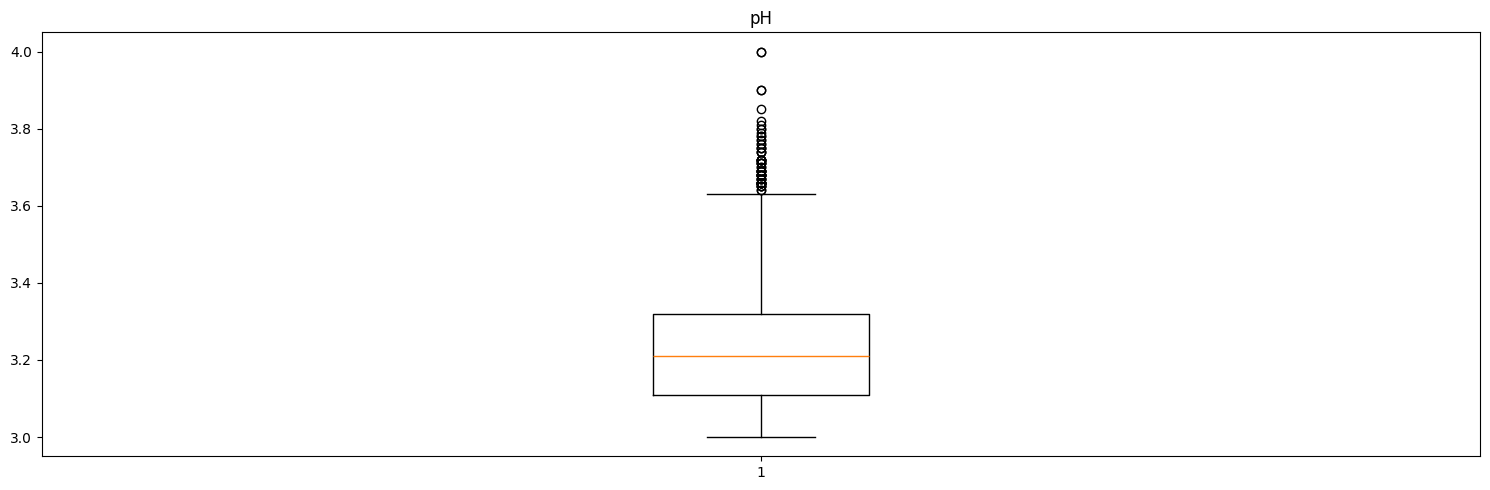

In [527]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['pH'])
axs.set_title('pH')

plt.tight_layout()

plt.show()

Aunque sigan existiendo outliers que se alejan de la muestra ahora se ha pasado a un rango más adecuado y estos tienen sentido.

##### Variable: **quality**

Existen 7 tipos de calidades registradas:

In [528]:
possible_qualities = df['quality'].unique()
possible_qualities

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Podemos ver su distribución mediante un histograma:

<BarContainer object of 7 artists>

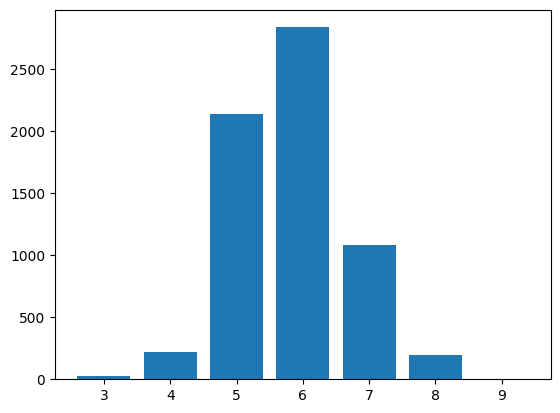

In [529]:
quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Se trata de una variable categórica y nos indica que las clases no están igual de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías: 

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta categorización nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

C:\Users\alfre\AppData\Local\Temp\ipykernel_23308\2396408820.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bad' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[bad, var] = 'bad'


<BarContainer object of 3 artists>

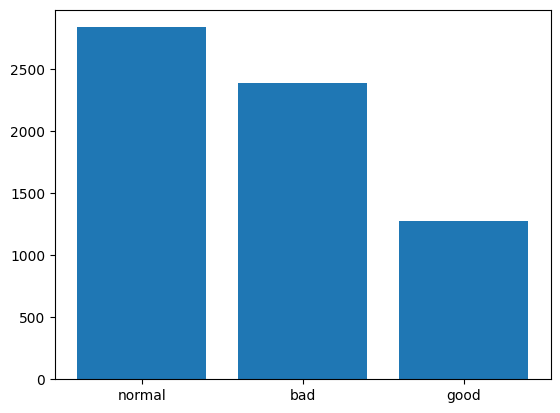

In [530]:
var = 'quality'

bad = df.loc[:, var] <= 5
normal = df.loc[:, var] == 6
good = df.loc[:, var] > 6

df.loc[bad, var] = 'bad'
df.loc[normal, var] = 'normal'
df.loc[good, var] = 'good'

quality_freq = df['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

##### Variable: **winetype**

La variable winetype no sabemos como se ha estimado, pero es sencilla, solo toma dos valores:

In [531]:
df['wine type'].unique()

array([1, 2], dtype=int64)

Existen más vinos que pertenecen al tipo 2 que al tipo 1:

In [532]:
winetype_freq = df['wine type'].value_counts()
winetype_freq

wine type
2    4896
1    1599
Name: count, dtype: int64

Con un histograma se observa mejor:

<BarContainer object of 2 artists>

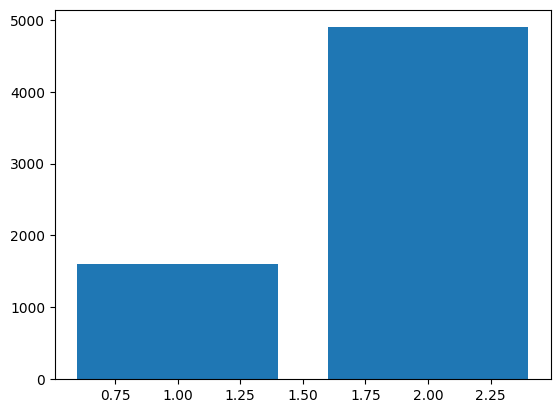

In [533]:
plt.bar(winetype_freq.index, winetype_freq.values)

##### Variable: **alcohol**

El alcohol en el vino se expresa en tanto y ronda entre 5.5% y 25%. Lo cual es coherente con los valores del dataset (suponemos que utilizan esta métrica). 

In [534]:
df.describe().drop('count').T.loc[['alcohol'], :]

,mean,std,min,25%,50%,75%,max
alcohol,10.491136,1.192268,8.0,9.5,10.3,11.3,14.9


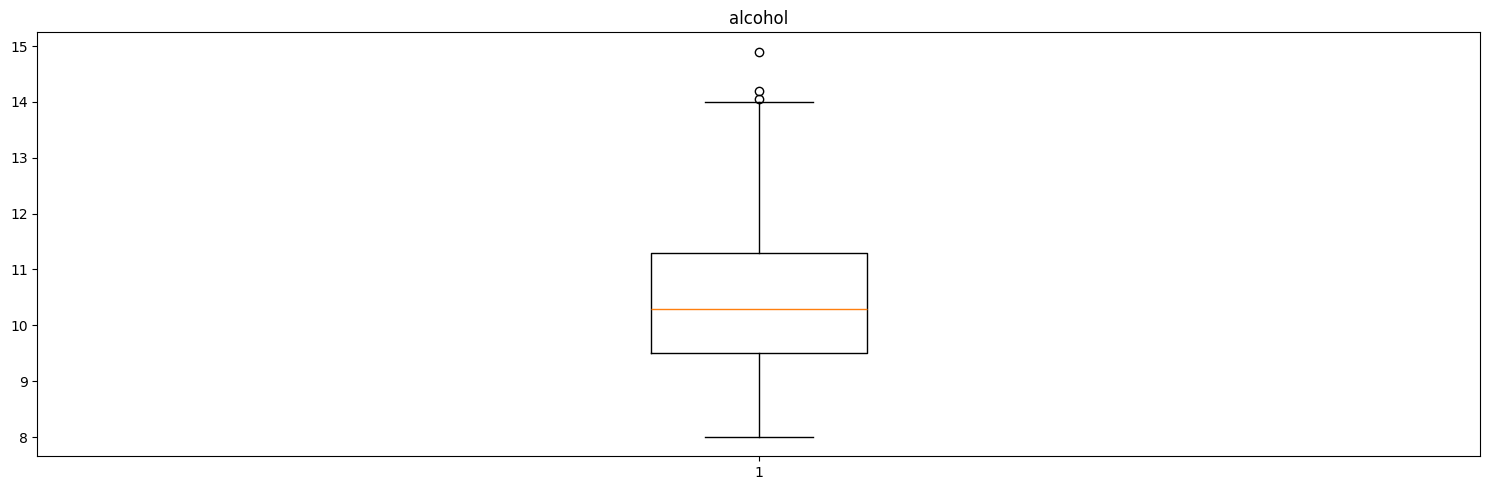

In [535]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

axs.boxplot(df['alcohol'])
axs.set_title('alcohol')

plt.tight_layout()

plt.show()

Finalmente una vez se han estudiado este subconjunto de variables, se realiza una eliminación de outliers utilizando el rango intercuartílico (IQR).

Se define una función para obtener un pandas dataframe con los límites a partir de los que categorizamos como outlier utilizando IQR:

In [536]:
import pandas as pd
def get_outlier_bounds(df:pd.DataFrame, selected_cols:list):
    selected_df = df[selected_cols]

    # Calcular el cuartil 1 (Q1) y el cuartil 3 (Q3)
    Q1 = selected_df.quantile(0.25)
    Q3 = selected_df.quantile(0.75)

    IQR = Q3 - Q1
    outliers_range = 1.5 * IQR

    lower_bound = Q1 - outliers_range
    upper_bound = Q3 + outliers_range

    outlier_bounds = pd.DataFrame({'Lower Bound': lower_bound, 'Upper Bound': upper_bound})

    return outlier_bounds


get_outlier_bounds(df, ['pH']).head()

,Lower Bound,Upper Bound
pH,2.795,3.635


Para saber cuando quitar outliers lo que haremos será ver si escasean (bajo un cierto umbral) en cuyo caso eliminaremos.

In [537]:
categorical_vars = ['wine type', 'quality']
df_non_categorical = df.drop(categorical_vars, axis=1) 
df_bounds = get_outlier_bounds(df_non_categorical, df_non_categorical.columns)
df_bounds

,Lower Bound,Upper Bound
fixed acidity,4.450000,9.650000
volatile acidity,-0.025000,0.655000
citric acid,0.040000,0.600000
residual sugar,-7.650000,17.550000
chlorides,-0.002500,0.105500
free sulfur dioxide,-19.000000,77.000000
total sulfur dioxide,-41.500000,274.500000
density,0.985365,1.003965
pH,2.795000,3.635000
sulphates,0.175000,0.855000


In [538]:
outliers_count = {}
for columna in df_bounds.index:
    lower_bound = df_bounds.loc[columna, 'Lower Bound']
    upper_bound = df_bounds.loc[columna, 'Upper Bound']
    outliers_count[columna] = ((df[columna] < lower_bound) | (df[columna] > upper_bound)).sum()

outliers_count

{'fixed acidity': 357,
 'volatile acidity': 377,
 'citric acid': 507,
 'residual sugar': 118,
 'chlorides': 286,
 'free sulfur dioxide': 62,
 'total sulfur dioxide': 9,
 'density': 3,
 'pH': 66,
 'sulphates': 191,
 'alcohol': 3}

De manera arbitraria vamos a elegir eliminar los outliers de una variable de manera aditiva hasta reducir en un 5% el tamaño del dataset:

In [539]:
len(df)

6495

In [540]:
outliers_count_remaining = {}
count = 0
curr_len = len(df)
for column in df_bounds.index[::-1]:
    lower_bound = df_bounds.loc[column, 'Lower Bound']
    upper_bound = df_bounds.loc[column, 'Upper Bound']
    outliers_cond = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers_count = (outliers_cond).sum()
    if count + outliers_count < curr_len * 0.05:
        count += outliers_count
        df = df.loc[~outliers_cond, :]
    else:
        outliers_count_remaining[column] = outliers_count    

outliers_count_remaining

{'chlorides': 233,
 'residual sugar': 114,
 'citric acid': 457,
 'volatile acidity': 347,
 'fixed acidity': 306}

In [541]:
len(df)

6172